In [19]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import codecs
from konlpy.tag import Twitter
from gensim.models import word2vec
from konlpy.utils import pprint
from sklearn.manifold import TSNE
from konlpy.tag import Okt

In [ ]:
sentences = [
                ['this', 'is', 'a',   'good',      'product'],
                ['it',   'is', 'a',   'excellent', 'product'],
                ['it',   'is', 'a',   'bad',       'product'],
                ['that', 'is', 'the', 'worst',     'product']
            ]

# 문장을 이용하여 단어와 벡터를 생성한다.
model = Word2Vec(sentences, size=5, window=3, min_count=2)

In [ ]:
# 단어벡터를 구한다.
word_vectors = model.wv

In [ ]:
print(word_vectors["this"])
print(word_vectors["the"])

In [ ]:
vocabs = word_vectors.vocab.keys()
print(vocabs)

In [ ]:
word_vectors_list = [word_vectors[v] for v in vocabs]
print(word_vectors_list)

In [ ]:
print(model.wv.similarity(w1='it', w2='the'))

In [ ]:
model.wv.most_similar('it')

In [ ]:
#파일 읽기 함수. 첫줄 헤더를 제외하고 한 줄씩 읽어서 data 에 담아서 리턴 한다.
def read_data(filename):
    with open(filename, encoding='utf-8', mode='r') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:]   # header 제외
    return data

ratings_train = read_data('ratings_train.txt')

In [ ]:
print(ratings_train[0])

In [20]:
okt = Okt()
def tokens(doc):
    return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)]

In [ ]:
tokens('아 더빙.. 진짜 짜증나네요 목소리')

In [ ]:
# 파일중에서 영화 리뷰 데이타만 담기
docs = []
for row in ratings_train:
    docs.append(row[1])
print(docs[:10])

In [ ]:
data = [tokens(d) for d in docs]

In [ ]:
w2v_model = word2vec.Word2Vec(data, size=100, window=3)

In [ ]:
w2v_model.save('naver.model')

In [ ]:
vocabs = w2v_model.wv.vocab.keys()
print(vocabs)

In [ ]:
print(w2v_model.wv.most_similar(positive=tokens(u'남자 여배우'), 
        negative=tokens(u'배우'), topn=5))

In [ ]:
print(w2v_model.wv.most_similar(tokens('엄마')))

In [ ]:
w2v_model = Word2Vec.load("naver.model")

In [ ]:
vocabs = w2v_model.wv.vocab.keys()
print(len(vocabs))

In [ ]:
vocab = list(w2v_model.wv.vocab)
print(vocab)

In [10]:
X = w2v_model[vocab]
print(X.shape)
print(X)

(27477, 100)
[[ 4.0819529e-01 -8.4327132e-01 -3.5046235e-01 ...  1.8095580e+00
  -1.0547279e+00 -8.2400024e-02]
 [-3.1744769e-01 -3.6357215e-01 -6.6273427e-01 ...  7.8319174e-01
  -5.3199142e-01  5.0992185e-01]
 [-1.5255909e-01 -4.6779764e-01  6.4982933e-01 ... -2.8316092e-01
  -6.1875921e-01  6.8003766e-02]
 ...
 [-6.9187622e-04 -3.0505581e-02 -7.4676205e-03 ... -3.1667246e-04
   6.2526227e-03  2.7786281e-02]
 [ 2.7441485e-02  6.0024532e-03  2.0997250e-02 ... -3.1012481e-02
  -8.6847050e-03  2.1675326e-02]
 [ 3.8935917e-03 -7.9850629e-03  2.3721796e-02 ... -1.8747423e-02
  -2.9154336e-03 -3.7520421e-03]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [11]:
tsne = TSNE(n_components=2)

In [12]:
X_tsne = tsne.fit_transform(X[:300,:])

In [13]:
print(X_tsne.shape)
print(X_tsne)

(300, 2)
[[ 2.01106048e+00 -6.17125320e+00]
 [-8.76215553e+00  4.65234947e+00]
 [ 9.60011578e+00 -8.64094162e+00]
 [ 9.63464546e+00  8.03406048e+00]
 [-6.63544059e-01 -8.59703445e+00]
 [-9.02257442e+00  7.17326212e+00]
 [ 1.22732282e+00 -5.39254522e+00]
 [ 9.50200272e+00 -8.64481258e+00]
 [ 4.05293703e+00 -2.72179890e+00]
 [ 9.72334290e+00 -1.37169914e+01]
 [-2.53272867e+00 -1.09316292e+01]
 [-8.02097511e+00  1.22976580e+01]
 [ 1.18087854e+01 -4.32354069e+00]
 [ 9.40695477e+00 -8.64566135e+00]
 [-6.45182562e+00  4.23745489e+00]
 [-9.62124538e+00  6.70665646e+00]
 [-3.98929811e+00  2.09926605e+00]
 [-5.64007044e+00  1.51600647e+00]
 [ 8.79638004e+00  5.30746460e+00]
 [-4.20896828e-01  7.98225498e+00]
 [-1.28725672e+00  3.59975189e-01]
 [ 1.73277521e+00 -3.02785802e+00]
 [ 7.81330645e-01 -1.47222924e+00]
 [ 9.66889191e+00 -1.36202383e+01]
 [ 5.95197248e+00 -1.42857170e+01]
 [-1.40767097e+01  4.73167181e+00]
 [-4.54912567e+00 -3.52452159e+00]
 [ 1.10046089e+00 -3.56196016e-01]
 [-5.374826

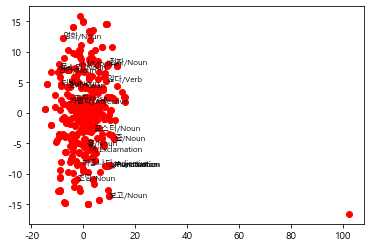

In [17]:
from matplotlib import font_manager, rc
import matplotlib as mpl
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False

plt.scatter(X_tsne[:,0], X_tsne[:,1], c='red')

words = vocab[:20]    
for i, word in enumerate(words):
    plt.text(X_tsne[i,0], X_tsne[i,1 ], word, fontsize=8) 
plt.savefig('out.png', dpi=200)


In [ ]:
group1 = w2v_model.wv.most_similar(tokens('포스터'), topn=30)
group1 = [w for ( w,  s )  in  group1 ]
X1 = w2v_model[group1]

group2 = w2v_model.wv.most_similar(tokens('정우성'), topn=30)
group2 = [w for ( w,  s )  in  group2 ]
X2 = w2v_model[group2]

In [ ]:
X_tsne =tsne.fit_transform(np.vstack([X1, X2]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


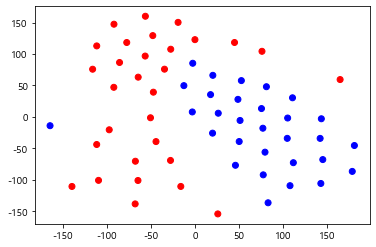

In [89]:
label = np.hstack([0*np.ones(30), np.ones(30)  ])
c = [ 'red'  if l == 0  else 'blue'  for l in label ]


plt.scatter(X_tsne[:,0], X_tsne[:,1], color=c)